# **Insurance Fraud Claims Detection**

# **Group 7 (ABT)**
**Group Members:**



*   Abdullah Alanazi 
*   Aedah Alrehaili
*   Ayat Bu-Suhail  
*   Bayan Alserhani
*   Thuraya Alruwaili

**Machine Learning in FinTech:**

**Area of FinTech**:  
Fraud Detection in Insurance Claims.

**Dataset researched and located**:  
https://www.kaggle.com/buntyshah/insurance-fraud-claims-detection/data

**ML Use Case**:  
Insurance claims Detect fraud, insurtch area of fintech

**Business Case :**
Insurance fraud is a major issue in the industry. It is difficult to determine whether or not a claim is fraudulent. IHS is in a unique position to assist the Auto Insurance industry in dealing with this issue.

**Statement of the Problem:** Data is stored in various systems, making it difficult to create analytics using multiple data sources. It takes time to copy data into a single platform.

**ML model selected**:  
Random forest, cross validation

**Reason**: 
Because we are dealing with small data
random forest It can be used to classify, identify fraudulent activity and predict diseases,and since we actually 
dealing with Detect fraud thats the model we need 


In [1]:
import pandas 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df= pandas.read_csv('insurance_claims.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [4]:
df.policy_state.unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [5]:
df.groupby('policy_state').size()


policy_state
IL    338
IN    310
OH    352
dtype: int64

In [6]:
Y = df['fraud_reported']=='Y'
df.drop(columns=['_c39','fraud_reported'],inplace=True)
df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998


In [7]:
Y.mean()

0.247

In [8]:
df.columns.sort_values().values


array(['age', 'authorities_contacted', 'auto_make', 'auto_model',
       'auto_year', 'bodily_injuries', 'capital-gains', 'capital-loss',
       'collision_type', 'incident_city', 'incident_date',
       'incident_hour_of_the_day', 'incident_location',
       'incident_severity', 'incident_state', 'incident_type',
       'injury_claim', 'insured_education_level', 'insured_hobbies',
       'insured_occupation', 'insured_relationship', 'insured_sex',
       'insured_zip', 'months_as_customer', 'number_of_vehicles_involved',
       'police_report_available', 'policy_annual_premium',
       'policy_bind_date', 'policy_csl', 'policy_deductable',
       'policy_number', 'policy_state', 'property_claim',
       'property_damage', 'total_claim_amount', 'umbrella_limit',
       'vehicle_claim', 'witnesses'], dtype=object)

In [9]:
visualize_cols = ['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains','capital-loss','total_claim_amount','injury_claim','property_claim','vehicle_claim','witnesses']



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

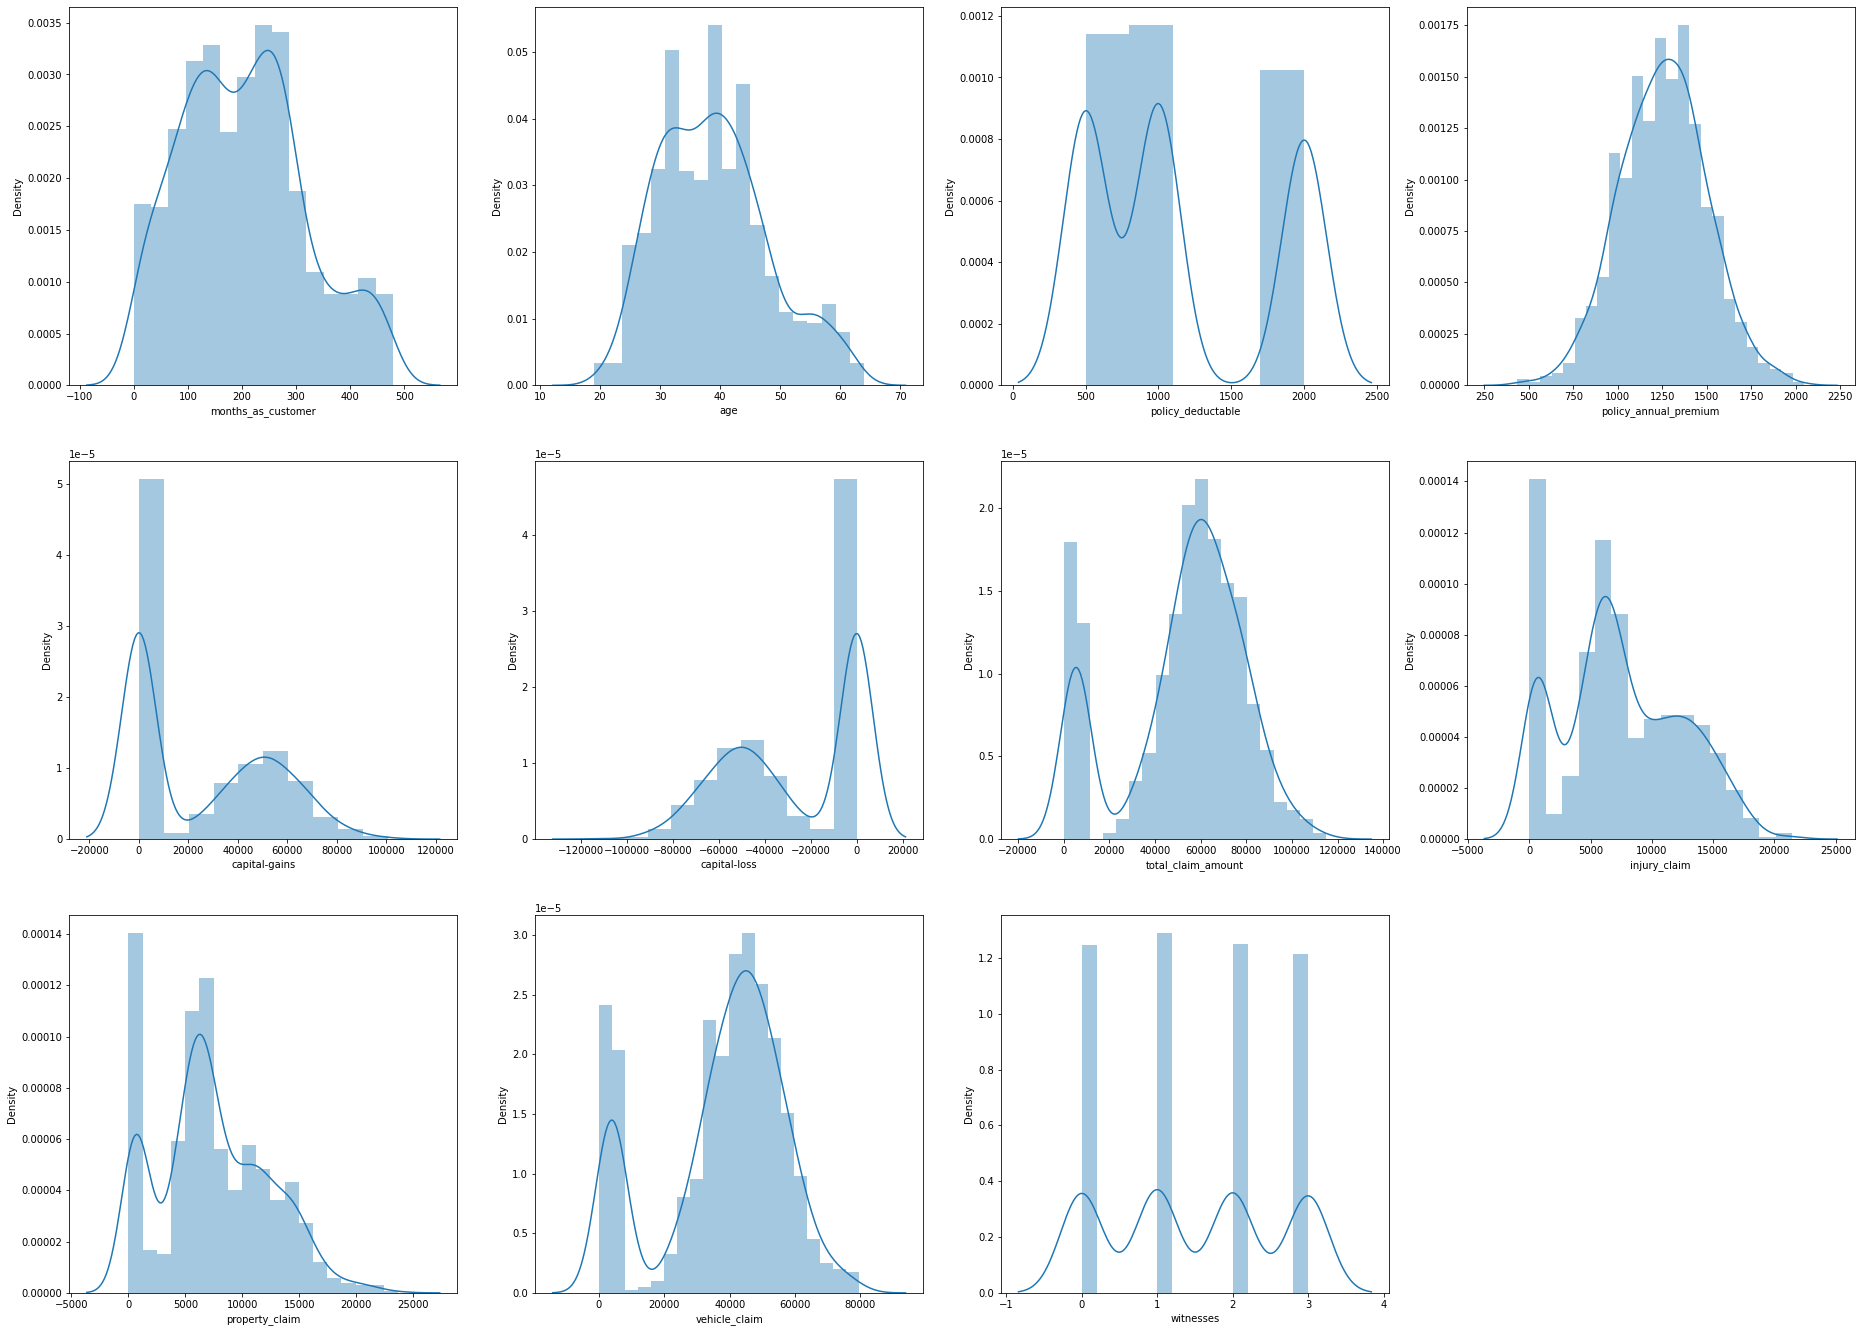

In [10]:
plt.figure(figsize=(32,32))

for i in range(len(visualize_cols)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[visualize_cols[i]])
plt.show()


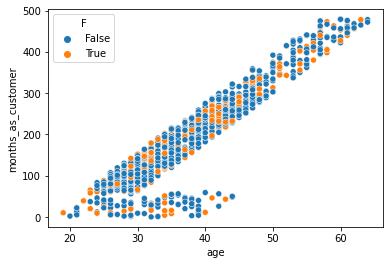

In [11]:
tdf = df.copy()
tdf['F']=Y
sns.scatterplot(x='age',y='months_as_customer',hue='F',data=tdf)

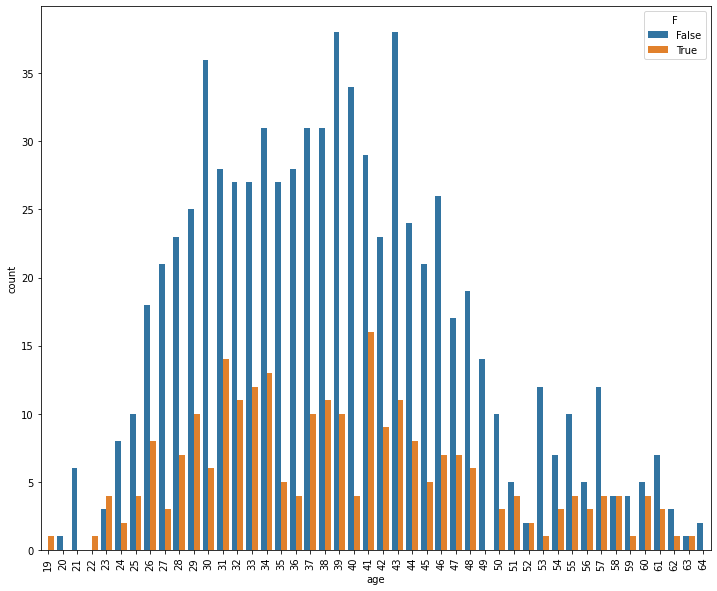

In [12]:
plt.figure(figsize=(12,10))
sns.countplot(x='age',hue='F',data=tdf)
plt.xticks(rotation=90)
plt.show()


In [13]:
fraud_ex_df = tdf[tdf['F']==True]

fraud_ex_df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,F
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,True
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,True
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,True
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-01-02,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,NO,0,2,NO,64100,6410,6410,51280,Saab,95,2003,True
14,180,38,644081,1998-12-28,OH,250/500,2000,1301.13,0,476685,FEMALE,College,machine-op-inspct,board-games,not-in-family,41300,-55500,2015-01-15,Single Vehicle Collision,Rear Collision,Total Loss,Police,SC,Springfield,6851 3rd Drive,12,1,NO,0,2,YES,46200,4200,8400,33600,Dodge,Neon,2003,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,1990-05-16,IN,100/300,500,951.56,0,455426,FEMALE,JD,transport-moving,video-games,wife,59400,-78600,2015-02-08,Multi-vehicle Collision,Side Collision,Major Damage,Police,SC,Riverwood,3884 Pine Lane,3,3,NO,2,1,?,98280,15120,7560,75600,Chevrolet,Tahoe,2007,True
977,266,42,929306,2003-03-06,IN,100/300,500,1093.83,4000000,468454,MALE,Associate,adm-clerical,board-games,other-relative,0,-49600,2015-02-21,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,WV,Springfield,4937 Flute Drive,18,3,?,1,1,NO,53280,4440,8880,39960,Suburu,Impreza,2015,True
982,230,43,490514,2007-02-09,IN,500/1000,2000,1101.83,0,451529,MALE,High School,exec-managerial,cross-fit,other-relative,28900,0,2015-01-01,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Arlington,7511 1st Ave,0,3,?,0,3,YES,51900,5190,10380,36330,BMW,M5,2011,True
986,232,42,182953,2013-04-30,IN,100/300,500,944.03,0,440153,MALE,College,handlers-cleaners,kayaking,not-in-family,0,-58400,2015-02-19,Single Vehicle Collision,Rear Collision,Minor Damage,Other,WV,Riverwood,8269 Sky Hwy,11,1,YES,2,3,?,77000,15400,7700,53900,Toyota,Highlander,2015,True


In [14]:
fraud_ex_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'F'],
      dtype='object')

In [15]:
pandas.pivot_table(fraud_ex_df,values=['number_of_vehicles_involved' , 'total_claim_amount','incident_hour_of_the_day'],index=['incident_type','collision_type'])


incident_hour_of_the_day  ...  total_claim_amount
incident_type            collision_type                             ...                    
Multi-vehicle Collision  Front Collision                 11.892857  ...        60970.000000
                         Rear Collision                  14.142857  ...        61152.448980
                         Side Collision                  11.432432  ...        62281.621622
Parked Car               ?                                7.000000  ...         5093.750000
Single Vehicle Collision Front Collision                 11.595238  ...        66596.190476
                         Rear Collision                  11.071429  ...        65782.857143
                         Side Collision                  11.787879  ...        68009.696970
Vehicle Theft            ?                                5.375000  ...         5197.500000

[8 rows x 3 columns]

In [16]:

import yellowbrick
from yellowbrick.datasets import load_credit
from yellowbrick.features import PCA as pca


In [17]:
x = df.copy()
classes = ['Reqular','Fruad']

In [18]:
X = x[x.columns].apply(pandas.to_numeric, errors='coerce')

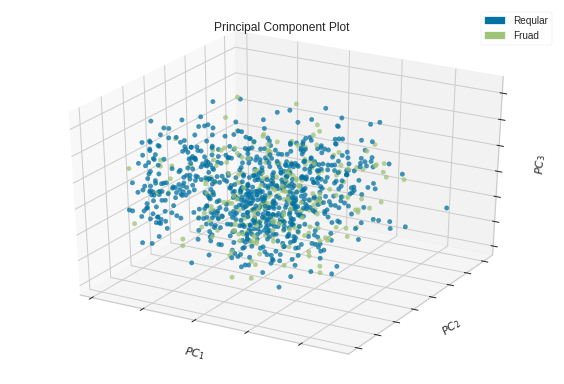

In [19]:
X.dropna(axis=1, inplace=True)
visualizer = pca(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X,Y.values+1-1)
visualizer.show()



array([[ 1.05255911,  1.4072333 ],
       [-3.82499836,  0.69324192],
       [-1.33657869, -0.84024492],
       ...,
       [ 0.04870445, -0.73343788],
       [ 0.16536129,  0.59189744],
       [-0.53945803,  0.01729404]])

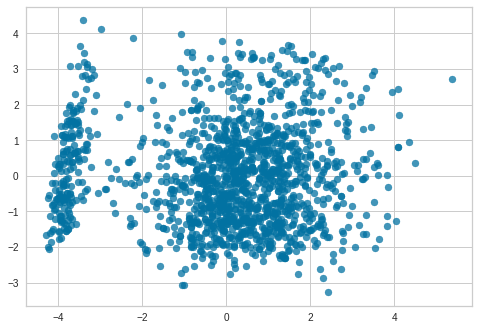

In [20]:
x_up, y_up = SMOTE().fit_resample(X,Y)
pca1 = pca()
X_scaled = pca1.fit_transform(x_up)
index = int (len(X_scaled)*0.7)
X_train = X_scaled[:index]
y_train = Y[:index]
y_test = X_scaled[index:]
X_test = Y[index:]
X_scaled


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


rfc_Model= RandomForestClassifier()
rfc_Model.fit(X_train, y_train)
y_pred = rfc_Model.predict(X_test)


In [23]:
sum(y_test == y_pred)/len(y_pred)


0.73

In [24]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       False       0.74      0.98      0.84       220
        True       0.43      0.04      0.07        80

    accuracy                           0.73       300
   macro avg       0.58      0.51      0.46       300
weighted avg       0.65      0.73      0.64       300

